## Problem Statement

- Task 1:-Prepare a complete data analysis report on the given data.
- Task 2:-Create a predictive model using machine learning techniques to predict  
  the various classes of skin disease.
- Task3:-Suggestions to the Doctors to identify the skin diseases of the patient at
  the earliest.

### Importing  necessary libraries 

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor  
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error,confusion_matrix
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 

###  Importing the datasets and Basic checks

In [3]:
data=pd.read_csv('dataset_35_dermatology .csv')
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3
5,2,3,2,0,0,0,0,0,0,0,0,0,2,1,0,2,2,0,2,0,0,0,1,0,0,0,0,2,0,0,0,1,0,41,2
6,2,1,0,2,0,0,0,0,0,0,0,0,0,0,3,1,3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,18,5
7,2,2,3,3,3,3,0,2,0,0,0,2,0,0,0,2,3,0,0,0,0,0,0,0,0,2,2,3,2,0,0,3,3,57,3
8,2,2,1,0,2,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,2,0,22,4
9,2,2,1,0,1,0,0,0,0,0,0,0,0,0,0,3,2,0,2,0,0,0,0,0,0,0,0,2,0,0,0,2,0,30,4


In [4]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3


In [5]:
data.tail()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
361,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50,3
365,3,2,2,0,0,0,0,0,3,3,0,0,0,1,0,0,2,0,2,3,2,3,0,2,0,2,0,0,0,0,0,3,0,35,1


In [6]:
data.shape

(366, 35)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

- There are total 366 entries in the dataset.
- Total 35 columns 34 int64 and 1 Object

In [8]:
data.size

12810

In [9]:
data.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [10]:
data.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     366 non-null    object
dtypes: object(1)
memory usage: 3.0+ KB


In [11]:
data.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,0.125683,0.404372,0.139344,0.546448,0.336066,1.368852,1.956284,0.527322,1.289617,0.663934,0.991803,0.633880,0.295082,0.363388,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,0.331946,0.869818,0.411790,0.815451,0.853139,1.104418,0.712512,0.757116,0.917562,1.056829,1.162161,1.034924,0.670578,0.759721,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


## Insights

- erythema: Erythema refers to redness of the skin caused by inflammation or increased blood flow. In this dataset, the mean       erythema is2.07, with a standard deviation of 0.66, indicating that moderate redness is present in most cases.

- scaling: Scaling refers to the presence of dry, flaky skin. The mean scaling is 1.80, with a standard deviation of 0.70,         indicating that scaling is a common feature in this dataset.

- definite_borders: Definite borders refer to the presence of clear, well-defined edges around a skin lesion. The mean definite   borders is 1.55, with a standard deviation of 0.91, indicating that definite borders are present in some but not all cases.

- itching: Itching refers to an uncomfortable sensation that makes you want to scratch your skin. The mean itching is 1.37, with a standard deviation of 1.14, indicating that itching is a relatively common symptom in this dataset.

- koebner_phenomenon: The Koebner phenomenon refers to the development of new skin lesions in response to trauma or injury. The mean koebner_phenomenon is 0.63, with a standard deviation of 0.91, indicating that this phenomenon is present in a minority of cases.

- polygonal_papules: Polygonal papules are small, raised bumps with flat tops and angular or polygonal shapes. The mean polygonal_papules is 0.45, with a standard deviation of 0.96, indicating that this feature is present in only a small number of cases.

- follicular_papules: Follicular papules are small, raised bumps that are centered around hair follicles. The mean follicular_papules is 0.17, with a standard deviation of 0.57, indicating that this feature is present in only a few cases.

- oral_mucosal_involvement: Oral mucosal involvement refers to the presence of skin lesions on the mucous membranes inside the mouth. The mean oral_mucosal_involvement is 0.38, with a standard deviation of 0.83, indicating that this feature is present in a minority of cases.

- knee_and_elbow_involvement: Knee and elbow involvement refers to the presence of skin lesions on the knees and/or elbows. The mean knee_and_elbow_involvement is 0.61, with a standard deviation of 0.98, indicating that this feature is present in some but not all cases.

- scalp_involvement: Scalp involvement refers to the presence of skin lesions on the scalp. The mean scalp_involvement is 0.52, with a standard deviation of 0.92, indicating that this feature is present in some but not all cases.

- family_history: Family history refers to a history of similar skin lesions in close relatives. The mean family_history is 0.13, with a standard deviation of 0.41, indicating that a family history is present in only a small number of cases.

- melanin_incontinence: Melanin incontinence refers to the presence of pigment-containing cells in the dermis, which can cause darkening of the skin. The mean melanin_incontinence is 0.40, with a standard deviation of 0.87, indicating that this feature is present in a minority of cases.

- eosinophils_in_the_infiltrate: Eosinophils are a type of white blood cell that can be present in skin lesions. The mean eosinophils_in_the_infiltrate is 0.14, with a standard deviation of 0.41, indicating that eosinophils are present in only a small number of cases.

- PNL_infiltrate: PNL infiltrate refers to the presence of inflammatory cells in the papillary dermis. The mean PNL_infiltrate is 0.55, with a standard deviation of 0.86, indicating that this feature is present in some but not all cases.

- fibrosis_of_the_papillary_dermis: Fibrosis of the papillary dermis refers to the presence of scar tissue in the dermis. The mean fibrosis_of_the_papillary_dermis is 0.46, with a standard deviation of 0.85, indicating that this feature is present in some but not all cases.

- exocytosis: Exocytosis refers to the movement of cells out of the epidermis. The mean exocytosis is 0.39, with a standard deviation of 0.83, indicating that this feature is present in a minority of cases.

- acanthosis: Acanthosis refers to the thickening of the epidermis. The mean acanthosis is 0.53, with a standard deviation of 0.90, indicating that this

- hyperkeratosis: Hyperkeratosis refers to the thickening of the stratum corneum, the outermost layer of the epidermis. The mean hyperkeratosis is 1.37, with a standard deviation of 1.11, indicating that hyperkeratosis is a relatively common feature in this dataset.

- parakeratosis: Parakeratosis refers to the presence of abnormal keratinocytes in the stratum corneum. The mean parakeratosis is 1.29, with a standard deviation of 1.05, indicating that parakeratosis is also a relatively common feature in this dataset.

- clubbing_of_the_rete_ridges: Clubbing of the rete ridges refers to the abnormal growth of the rete ridges, which are the extensions of the epidermis into the dermis. The mean clubbing_of_the_rete_ridges is 0.45, with a standard deviation of 0.83, indicating that this feature is present in a minority of cases.

- elongation_of_the_rete_ridges: Elongation of the rete ridges refers to the lengthening of the rete ridges. The mean elongation_of_the_rete_ridges is 0.51, with a standard deviation of 0.90, indicating that this feature is present in some but not all cases.

- thinning_of_the_suprapapillary_epidermis: Thinning of the suprapapillary epidermis refers to the reduction in thickness of the epidermis above the papillary dermis. The mean thinning_of_the_suprapapillary_epidermis is 0.42, with a standard deviation of 0.84, indicating that this feature is present in a minority of cases.

- spongiform_pustule: Spongiform pustules are small, fluid-filled blisters that form in the epidermis. The mean spongiform_pustule is 0.35, with a standard deviation of 0.79, indicating that this feature is present in a minority of cases.

- munro_microabcess: Munro microabscesses are small, pus-filled cavities that form in the epidermis. The mean munro_microabcess is 0.29, with a standard deviation of 0.73, indicating that this feature is present in a minority of cases.

- focal_hypergranulosis: Focal hypergranulosis refers to the abnormal growth of granular cells in the epidermis. The mean focal_hypergranulosis is 0.41, with a standard deviation of 0.83, indicating that this feature is present in a minority of cases.

- disappearance_of_the_granular_layer: Disappearance of the granular layer refers to the loss of the granular layer of the epidermis. The mean disappearance_of_the_granular_layer is 0.38, with a standard deviation of 0.81, indicating that this feature is present in a minority of cases.

- vacuolisation_and_damage_of_basal_layer: Vacuolisation and damage of the basal layer refer to the formation of vacuoles and damage to the basal layer of the epidermis. The mean vacuolisation_and_damage_of_basal_layer is 0.44, with a standard deviation of 0.86, indicating that this feature is present in some but not all cases.

- spongiosis: Spongiosis refers to the formation of small, fluid-filled cavities in the epidermis. The mean spongiosis is 0.49, with a standard deviation of 0.90, indicating that this feature is present in some but not all cases.

- saw-tooth_appearance_of_retes: Saw-tooth appearance of retes refers to the irregular, saw-tooth-like shape of the rete ridges. The mean saw-tooth_appearance_of_retes is 0.39, with a standard deviation of 0.83, indicating that this feature is present in a minority of cases.

- follicular_horn_plug: Follicular horn plug refers to the presence of a keratinous plug in the hair follicle. The mean follicular_horn_plug is 0.31, with a standard deviation of 0.75, indicating that this feature is present in a minority of cases.

- perifollicular_parakeratosis: Perifollicular parakeratosis refers to the presence of abnormal keratinocytes around the hair follicle. The mean perifollicular_parakeratosis is 0.43, with a standard deviation of 0.85, indicating that this feature is present in some but not all cases.

- band-like_infiltrate: Band-like infiltrate refers to the presence of a band-like pattern of inflammatory cells in the dermis. The mean band-like_infiltrate is 0.47, with a standard deviation of 0.88, indicating that this feature is present in some but not all cases.

- class: This column represents the class or diagnosis of the skin lesion. The class distribution is likely to be imbalanced, with some classes having more instances than others. Understanding the class distribution is important for developing an effective classification model.
- Age column approximately normally distributed

In [12]:
data.describe(include=["object"])

,Age
count,366
unique,61
top,40
freq,17


## EDA

### Univariate analysis

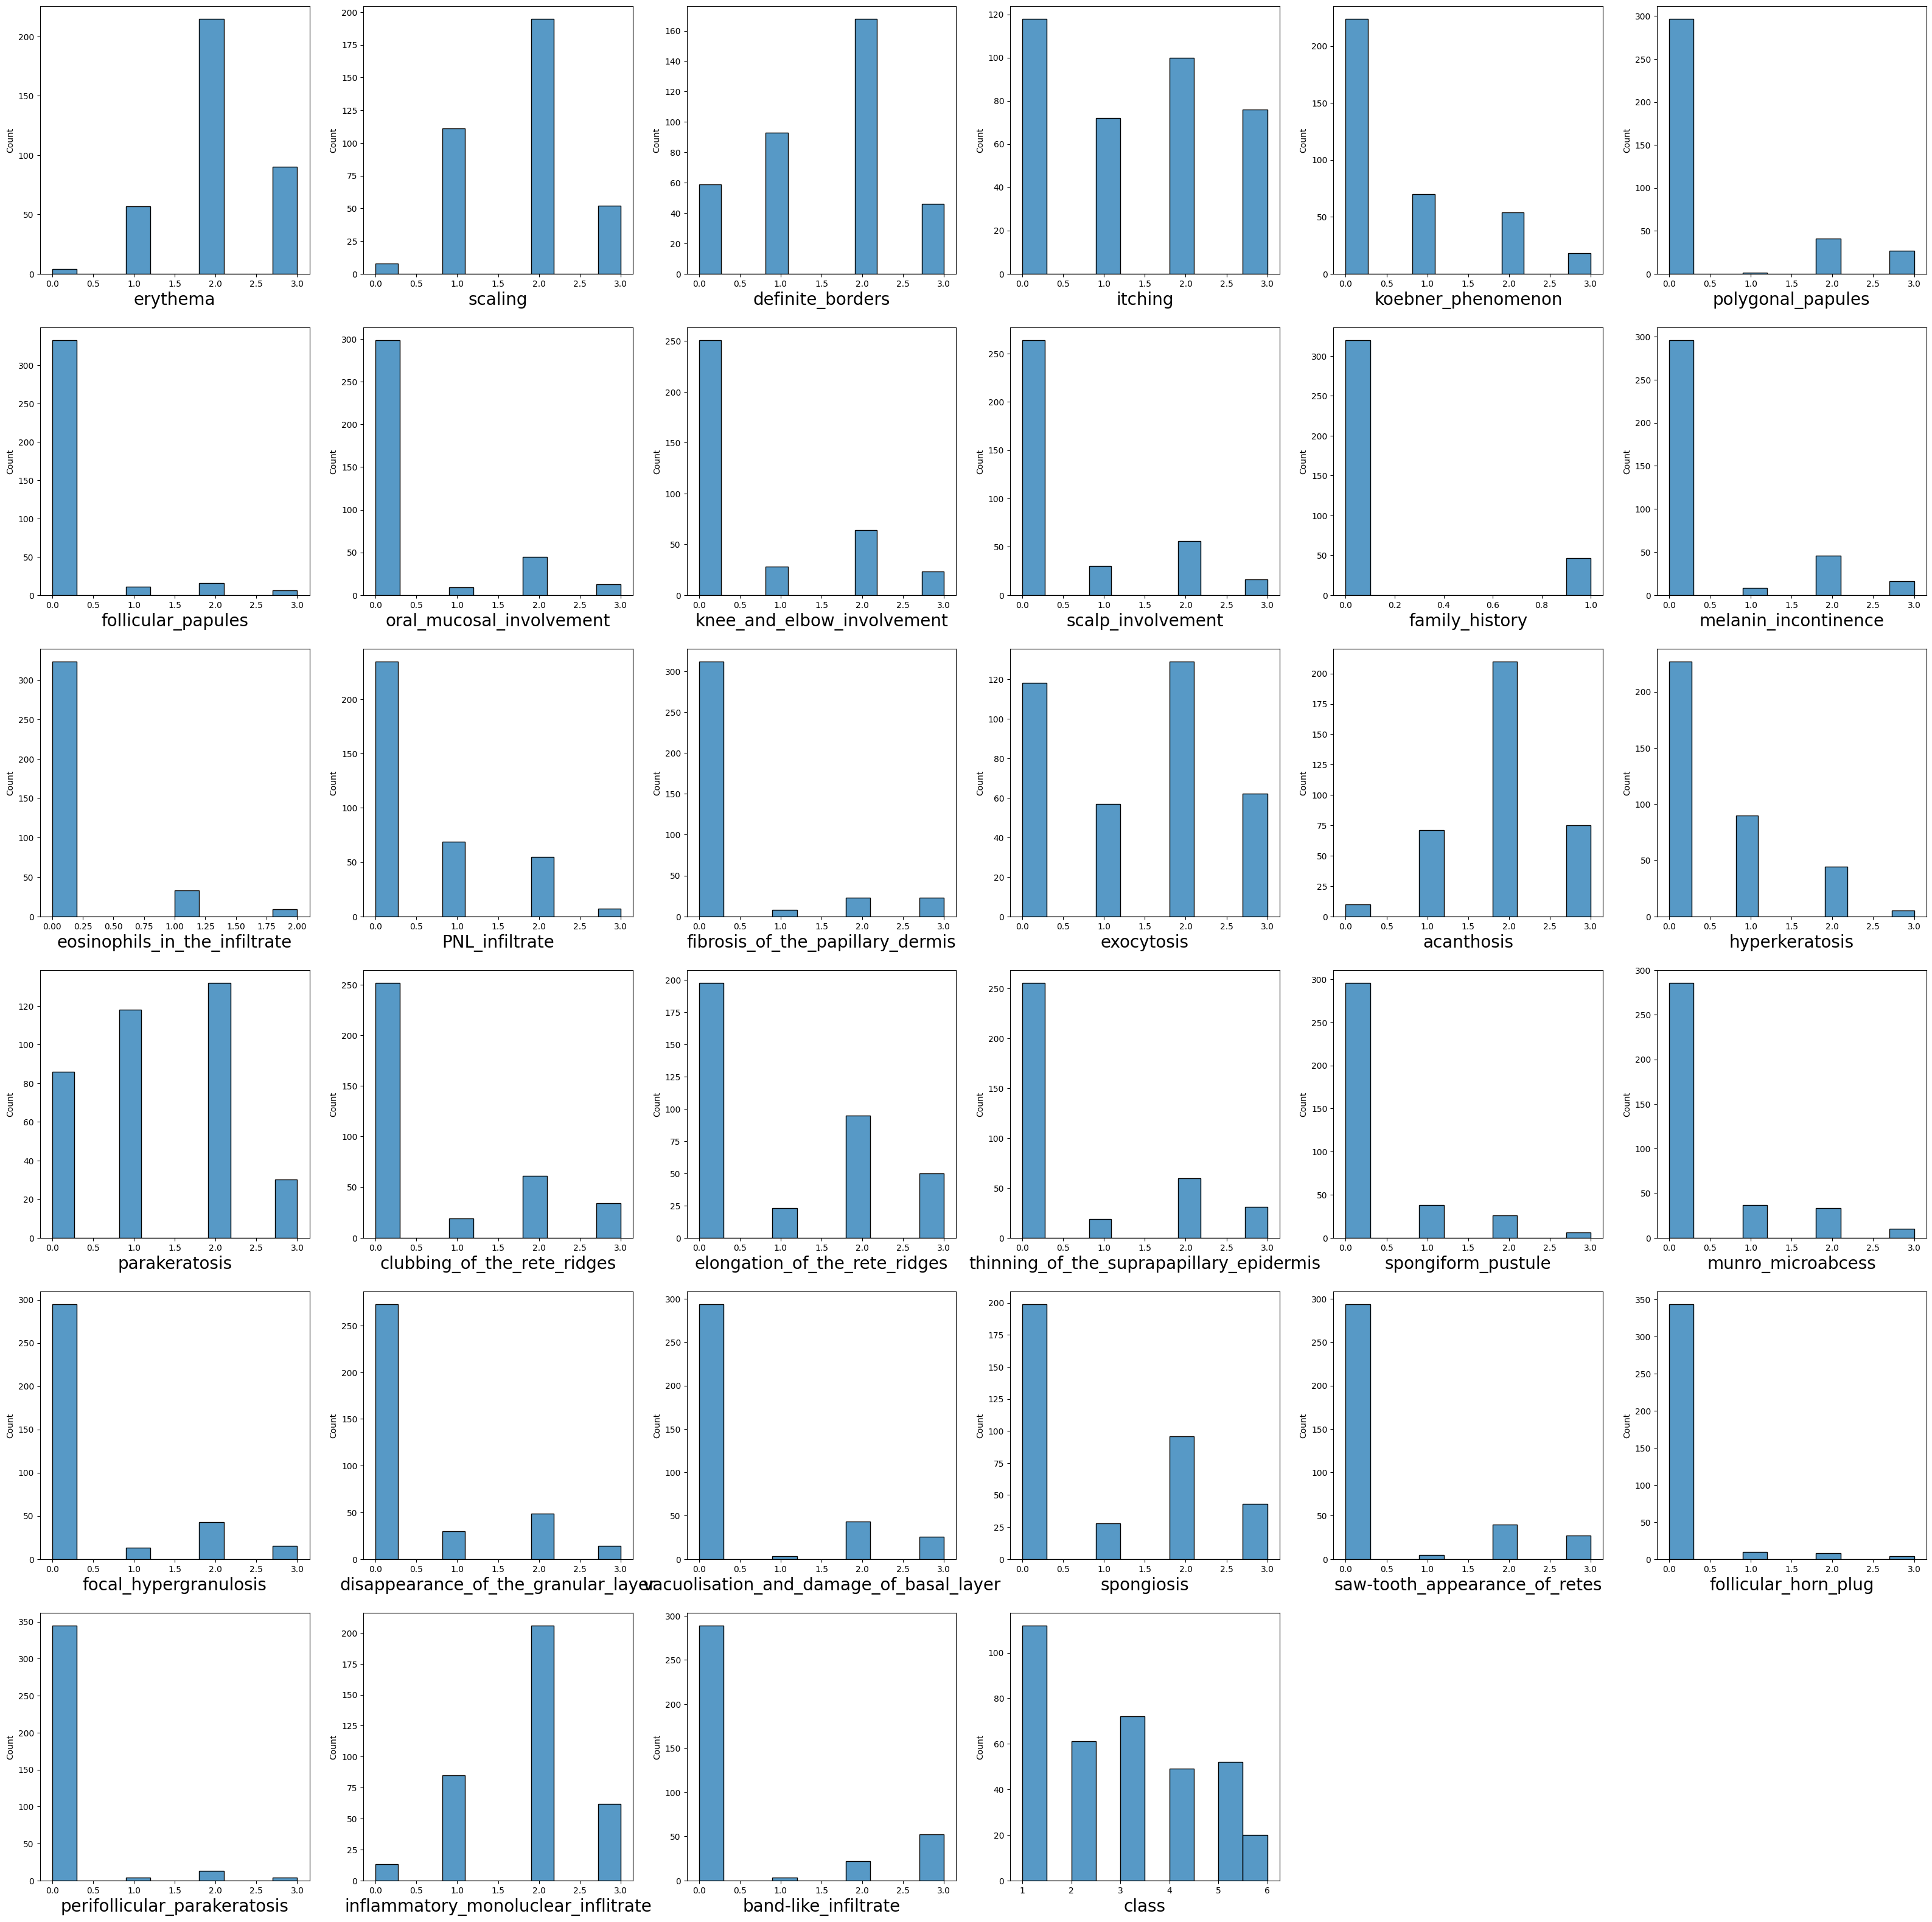

In [13]:
cols=['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate','class']
plt.figure(figsize=(40,40), facecolor='white')
plotnumber = 1

for column in cols:
    if plotnumber<=34: 
        ax = plt.subplot(6,6,plotnumber)
        sns.histplot(data[column])
        plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.show()

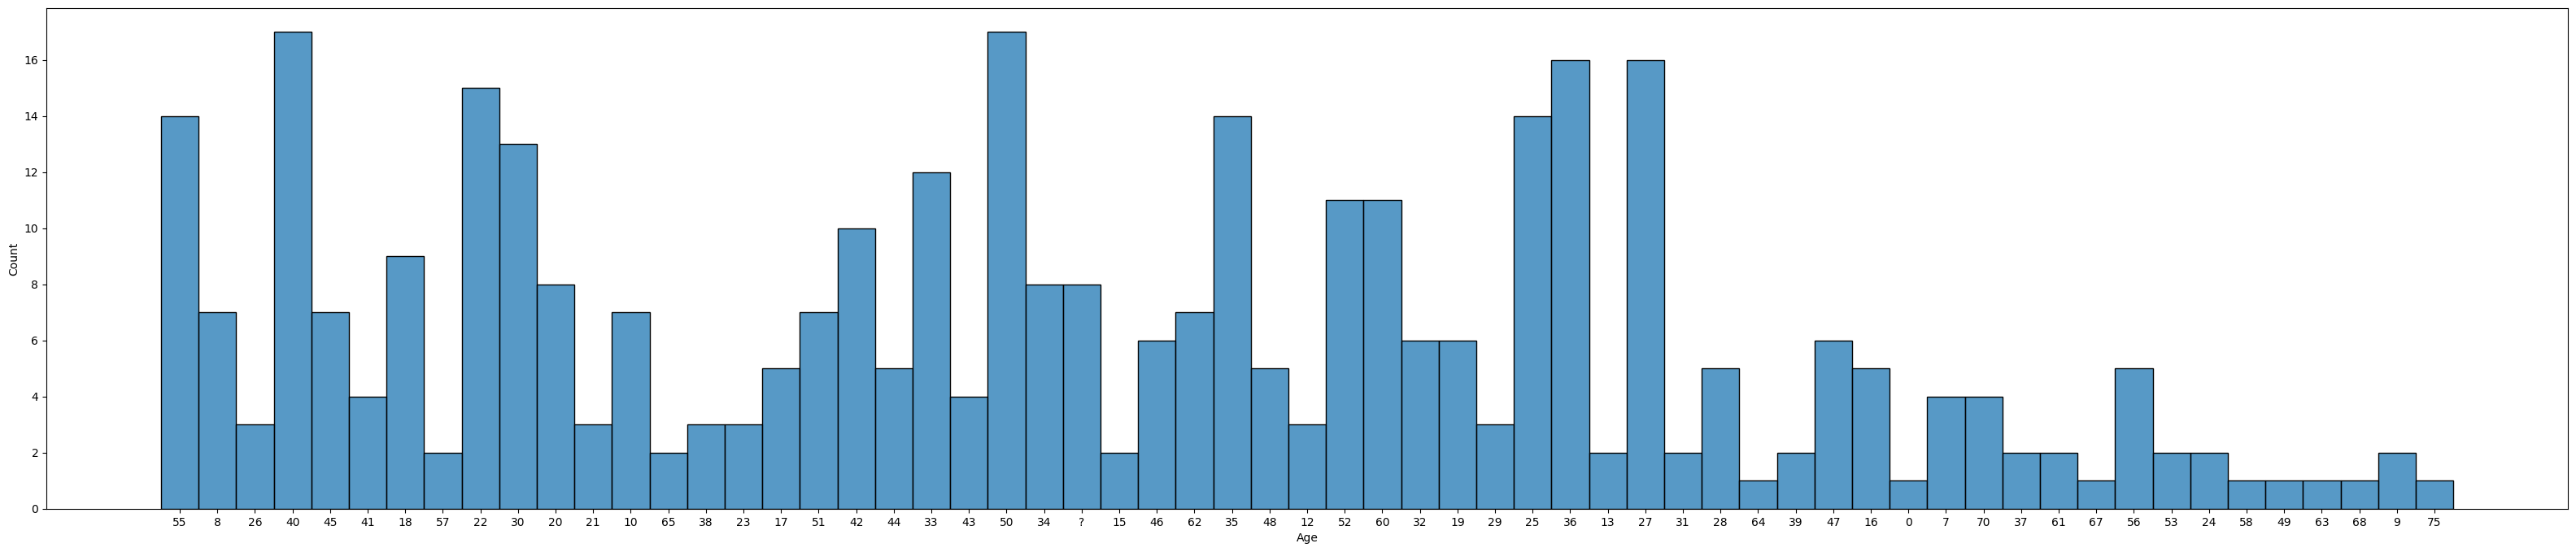

In [14]:
plt.figure(figsize=(40,8))
sns.histplot(x='Age',data=data)
plt.show()

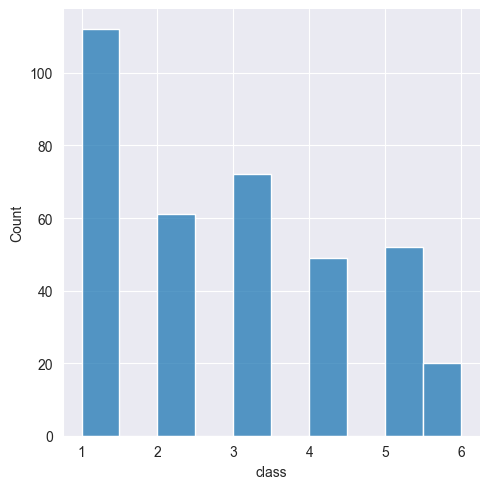

In [57]:
sns.displot(x='class',data=data)

### Insights
- There are more than 100 of records that lies under class 1.
- There are more than 60 of records that lies under class 3.


In [15]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

- In Age column there are 8 missing values are present we need to fill thses 

In [57]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [15]:
#data.fillna(data.mean(), inplace=True)

### Bivariate Analysis

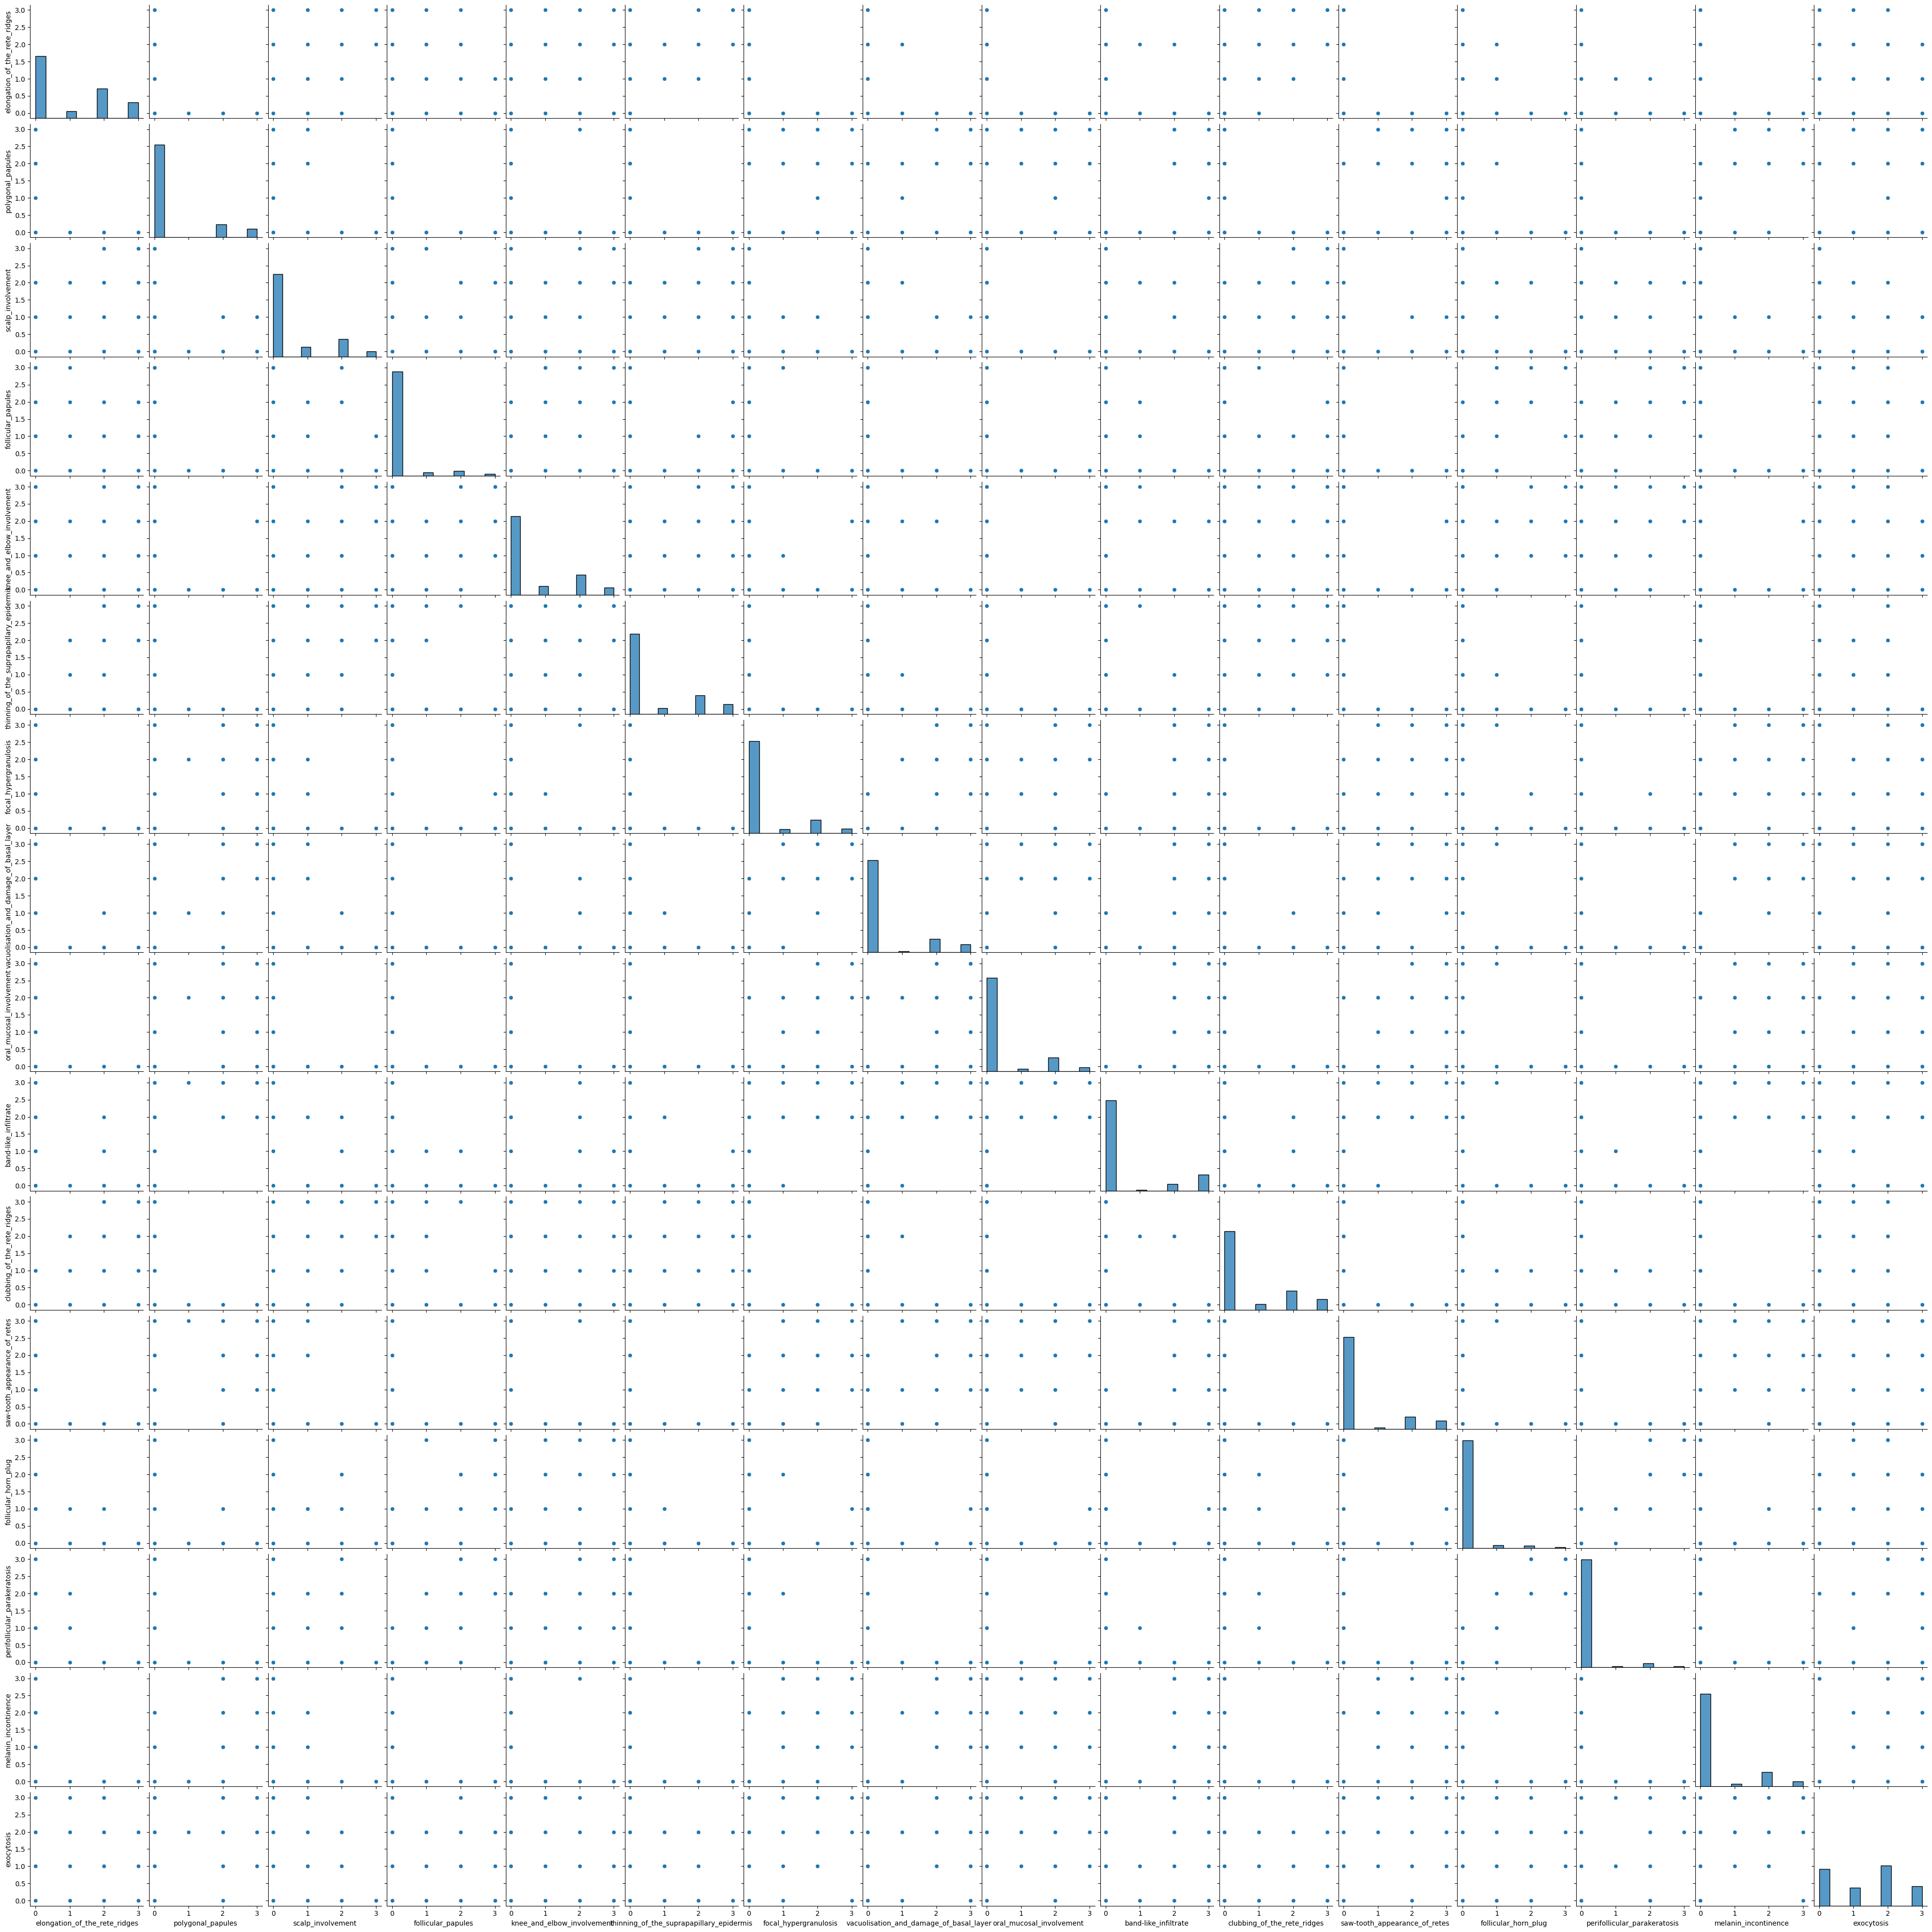

In [16]:
sns.pairplot(data[['elongation_of_the_rete_ridges', 'polygonal_papules', 'scalp_involvement', 'follicular_papules',
     'knee_and_elbow_involvement', 'thinning_of_the_suprapapillary_epidermis', 'focal_hypergranulosis',
     'vacuolisation_and_damage_of_basal_layer', 'oral_mucosal_involvement', 'band-like_infiltrate',
     'clubbing_of_the_rete_ridges', 'saw-tooth_appearance_of_retes', 'follicular_horn_plug', 'perifollicular_parakeratosis',
     'melanin_incontinence', 'exocytosis']])
plt.show()

## Data Preprocessing 

### Droping Unwanted column

In [19]:
data.drop('Age',axis=1,inplace=True)

In [20]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,3


###  Checking null values 

In [21]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

###  Handling Outliers

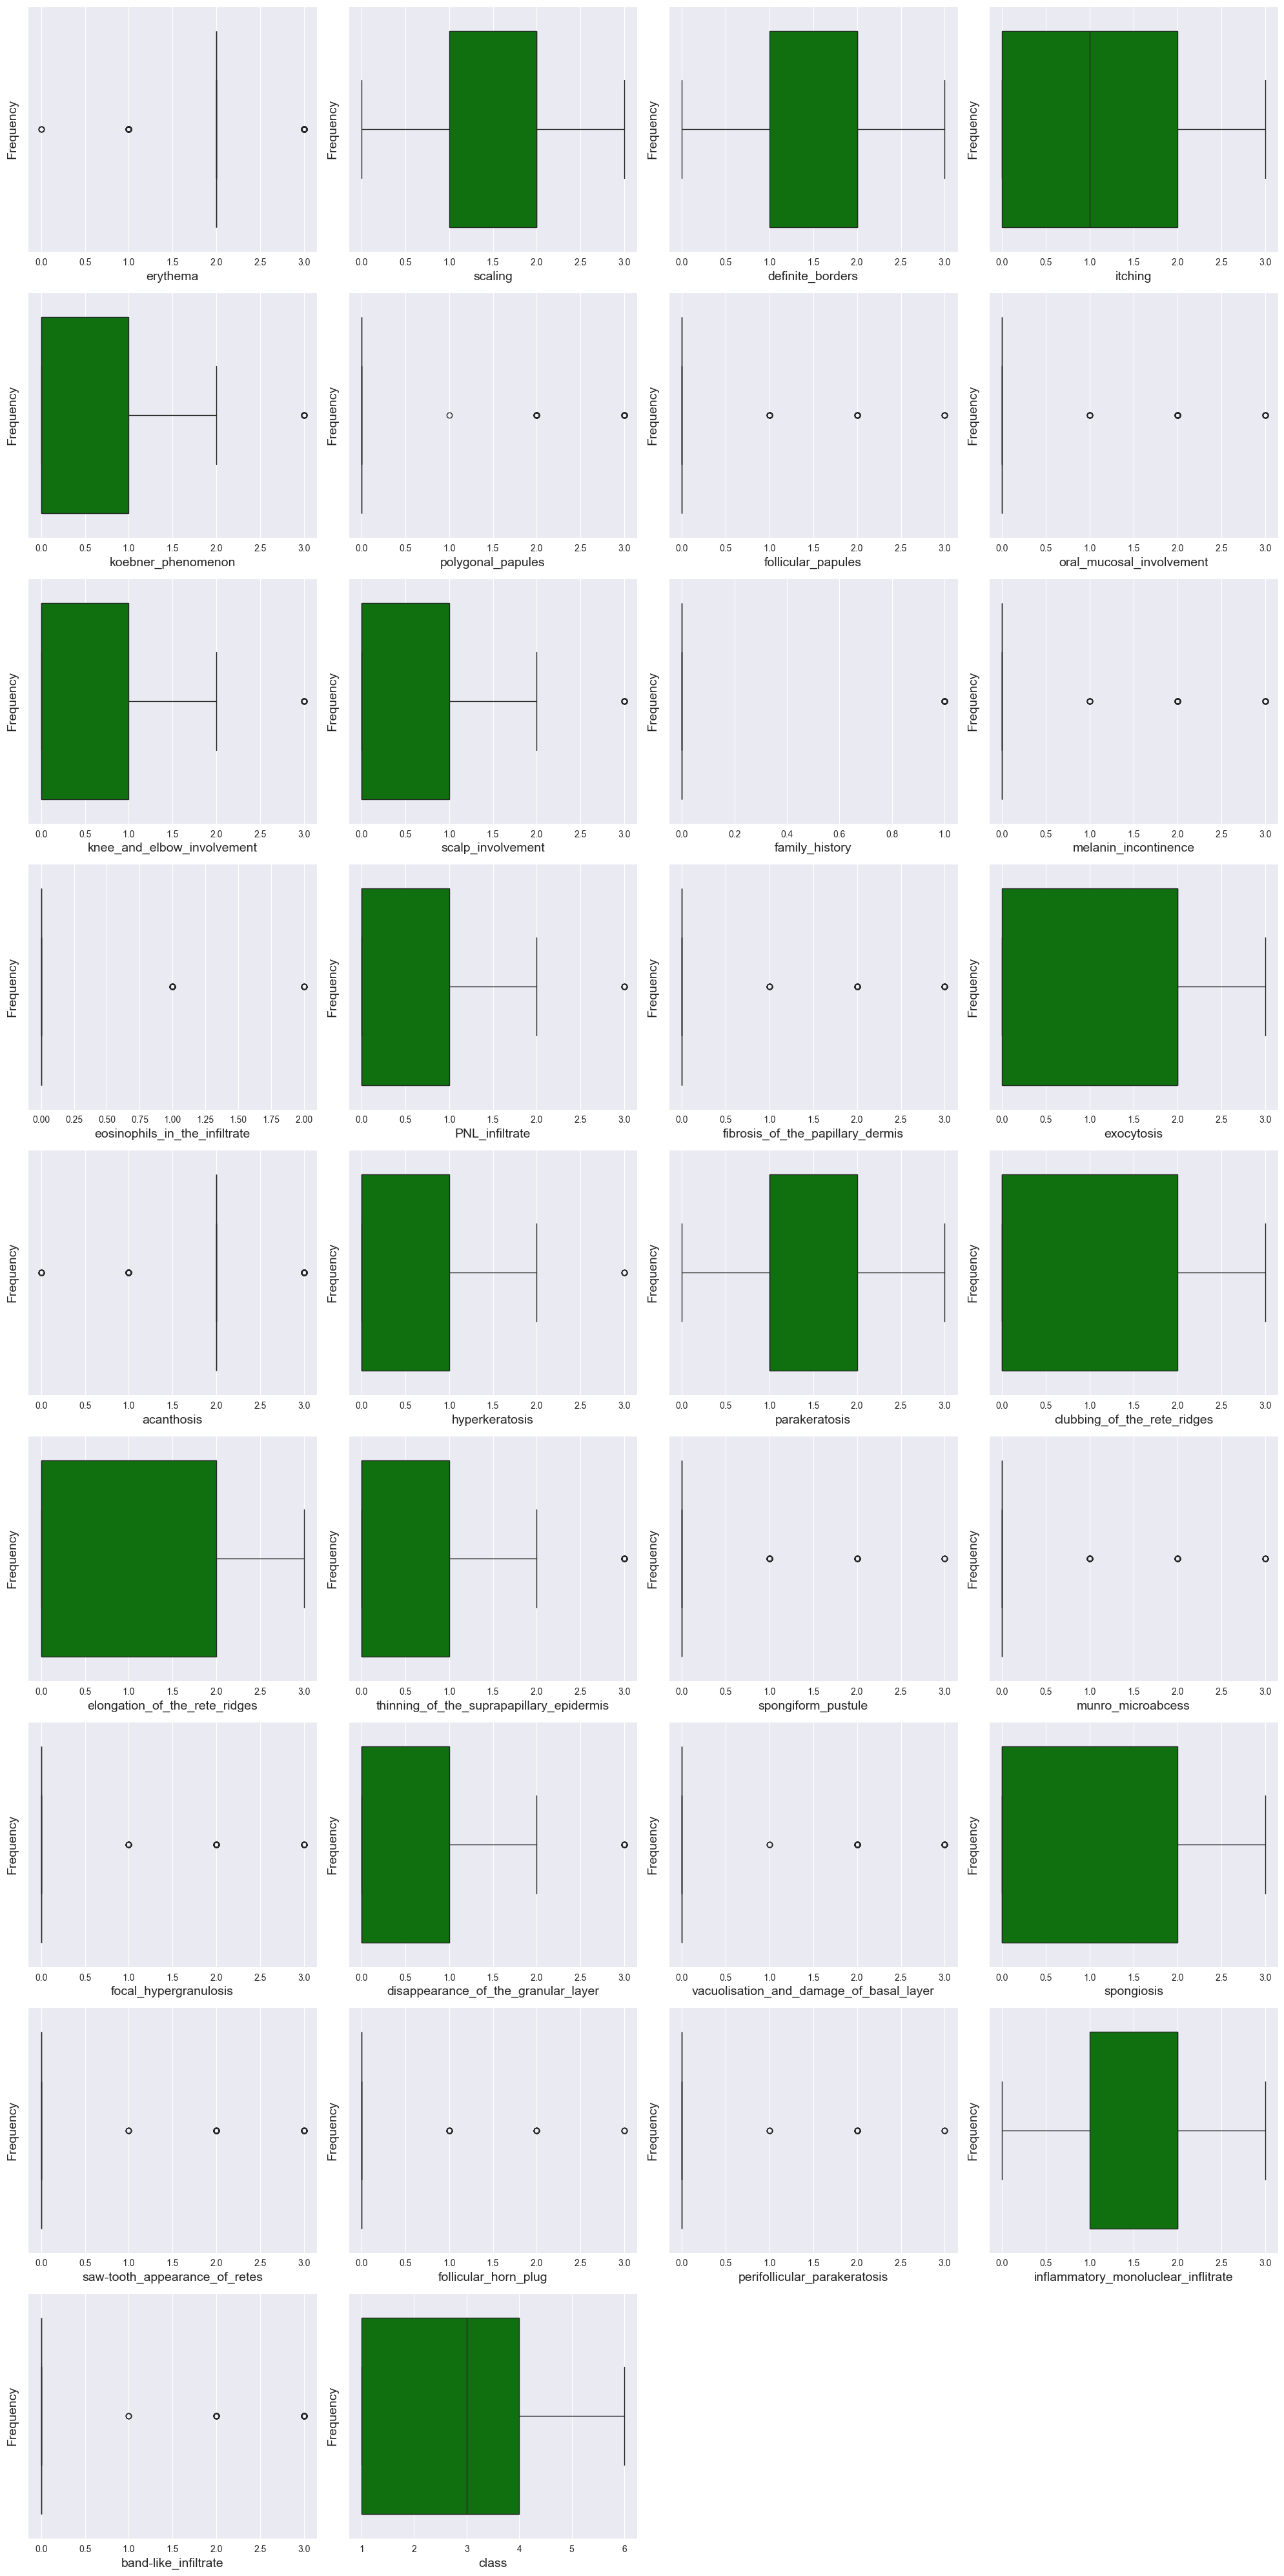

In [58]:
var=['elongation_of_the_rete_ridges', 'polygonal_papules', 'scalp_involvement', 'follicular_papules',
     'knee_and_elbow_involvement', 'thinning_of_the_suprapapillary_epidermis', 'focal_hypergranulosis',
     'vacuolisation_and_damage_of_basal_layer', 'oral_mucosal_involvement', 'band-like_infiltrate',
     'clubbing_of_the_rete_ridges', 'saw-tooth_appearance_of_retes', 'follicular_horn_plug', 'perifollicular_parakeratosis',
     'melanin_incontinence', 'exocytosis']
plt.figure(figsize=(20,40))
sns.set_style('darkgrid')

plot=1
for col in data:
    if plot<=36:
        plt.subplot(9,4,plot)
        sns.boxplot(data=data, x=col, color='green')
        plt.xlabel(col,fontsize=14)
        plt.ylabel('Frequency',fontsize=14)
        plot+=1
plt.tight_layout()

###  IQR method

In [59]:
Q1=data[var].quantile(0.25)
Q3=data[var].quantile(0.75)


IQR=Q3-Q1

min_range=Q1-1.5*IQR
max_range=Q3+1.5*IQR

In [60]:
outlier_count = ((data[var]>max_range) | (data[var]<min_range)).sum()
print(outlier_count)

elongation_of_the_rete_ridges                0
polygonal_papules                           69
scalp_involvement                           16
follicular_papules                          33
knee_and_elbow_involvement                  23
thinning_of_the_suprapapillary_epidermis    31
focal_hypergranulosis                       71
vacuolisation_and_damage_of_basal_layer     72
oral_mucosal_involvement                    67
band-like_infiltrate                        77
clubbing_of_the_rete_ridges                  0
saw-tooth_appearance_of_retes               72
follicular_horn_plug                        22
perifollicular_parakeratosis                21
melanin_incontinence                        70
exocytosis                                   0
dtype: int64


### Feature Selection 

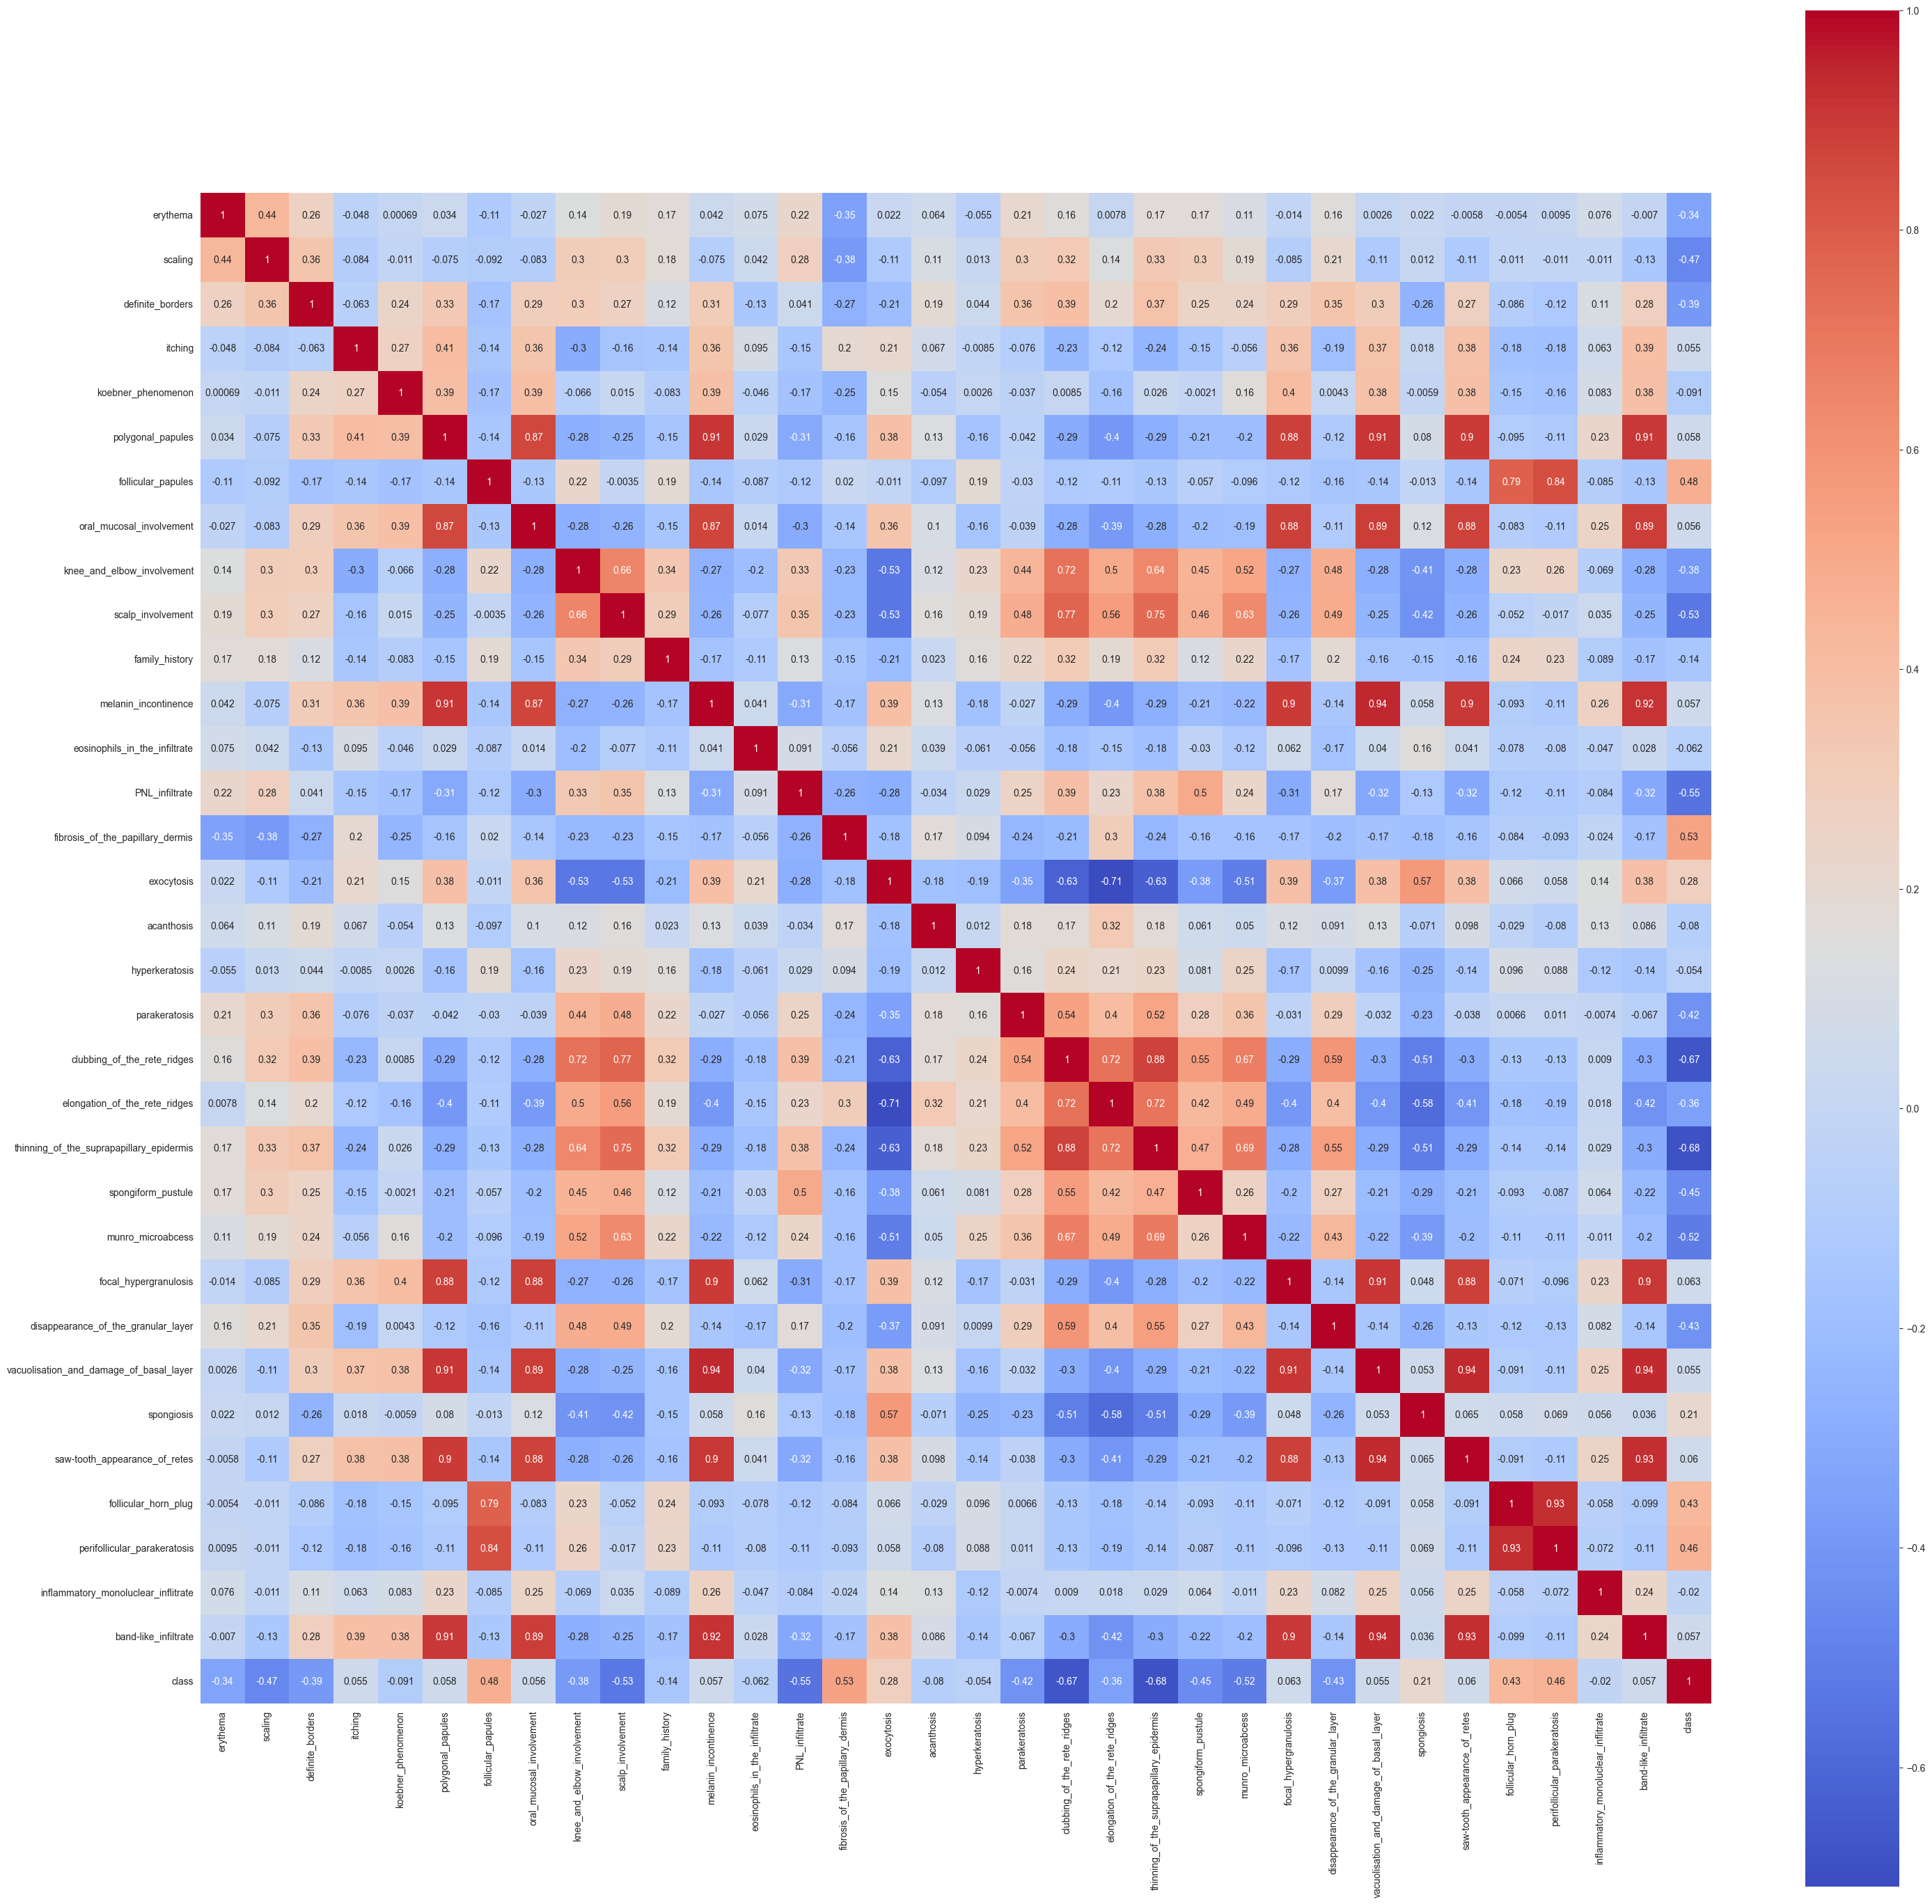

In [25]:

plt.figure(figsize=(35,35))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

In [26]:
important_attributes = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            important_attributes.append(corr_matrix.columns[i])
            important_attributes.append(corr_matrix.columns[j])

# Remove duplicates
important_attributes = list(set(important_attributes))

print("Important Attributes:", important_attributes)

Important Attributes: ['thinning_of_the_suprapapillary_epidermis', 'focal_hypergranulosis', 'knee_and_elbow_involvement', 'clubbing_of_the_rete_ridges', 'perifollicular_parakeratosis', 'saw-tooth_appearance_of_retes', 'follicular_papules', 'oral_mucosal_involvement', 'elongation_of_the_rete_ridges', 'band-like_infiltrate', 'follicular_horn_plug', 'polygonal_papules', 'exocytosis', 'melanin_incontinence', 'scalp_involvement', 'vacuolisation_and_damage_of_basal_layer']


## Feature Extraction

###  PCA technique 

In [29]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,3


In [30]:
X = data.drop('class', axis=1)
y = data['class']

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

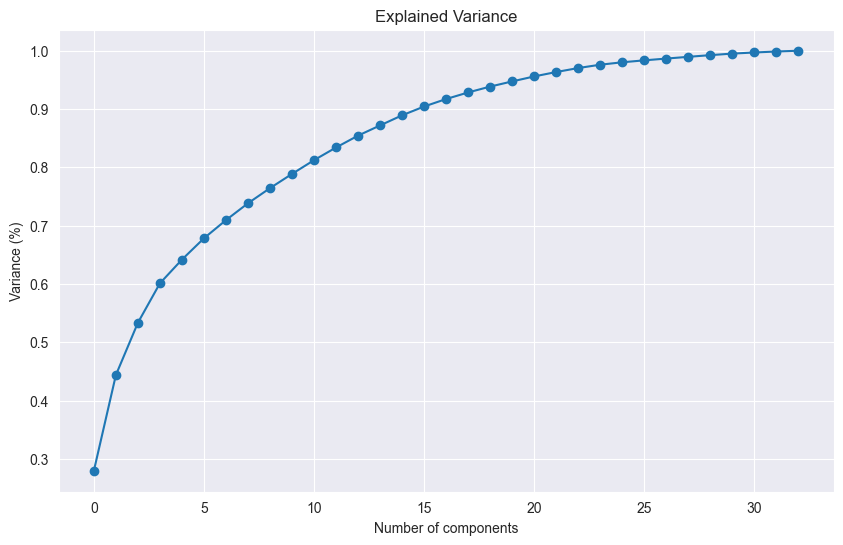

In [32]:
from sklearn.decomposition import PCA
pca=PCA()
principalComponents = pca.fit_transform(X_scaled)
cumsum_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10,6))
plt.plot(cumsum_explained_variance, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

In [33]:
pca=PCA(n_components=20)
principle_components=pca.fit_transform(X_scaled)

In [34]:
transformed_data=pd.DataFrame(principle_components,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11',
                                                            'PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20'])

In [35]:
transformed_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-0.918932,-2.772265,-0.718600,-1.197310,0.290522,0.203207,-0.796010,0.422798,0.064558,0.503580,-1.160000,-1.150319,-0.023775,-1.258247,-0.698165,0.462375,-1.281890,0.119574,-0.850427,-0.024510
1,3.164942,2.223191,0.324611,-1.415948,-0.218075,1.205398,-0.722051,-0.919592,-1.727341,1.308884,-0.993886,-0.008467,-1.449903,0.895543,1.232920,-0.117257,-0.385561,0.705723,-0.828994,0.822681
2,-5.239504,2.229374,0.275774,0.370124,-0.030415,-0.060160,0.038326,-0.289489,0.381377,0.412957,-0.212137,-1.565821,0.639486,0.052044,0.116973,-0.667632,0.482188,1.536498,0.284086,-0.020398
3,4.479892,2.821623,-0.025012,-1.094104,-1.070450,-1.626899,3.141046,-0.360629,0.071398,0.217238,0.458652,-0.722928,0.442172,-1.202239,0.254906,-1.233160,0.261108,-0.936420,0.787318,-1.075498
4,-4.759297,2.879121,0.330586,-0.471330,0.433990,-1.014383,-0.465495,-0.293375,-0.100750,-0.037790,-1.122270,0.421796,-0.678473,-1.870658,-0.031545,0.775227,0.045849,0.382743,1.823028,-0.064839


In [36]:
transformed_data = transformed_data.values

##  Model Implementation

### RandomForestClassifier 

In [37]:
x_train, x_test, Y_train, Y_test = train_test_split(principle_components, y, test_size=0.2, random_state=42) 

In [38]:
x_train

array([[ 0.20949264, -2.51450607, -2.10399539, ..., -0.11674175,
         0.48292707, -0.3605367 ],
       [ 0.14699526, -2.39175275, -0.7306255 , ..., -0.18469237,
         0.92213207, -0.10448121],
       [-0.06915052, -1.65525944, -0.58414462, ..., -0.21931535,
         0.180177  , -0.28943547],
       ...,
       [-0.5812229 , -2.10314533, -0.63242038, ...,  0.28172049,
         0.45036686, -0.04140132],
       [ 0.93214517, -3.15605664,  8.63526595, ...,  0.52394749,
         0.34888615,  0.94644514],
       [ 2.48767307,  2.28682783, -0.09974459, ..., -0.05929983,
         0.22296556, -1.27154716]])

In [40]:
Y_train

341    5
202    5
75     2
84     5
354    5
16     2
66     1
271    4
7      3
113    3
116    2
324    1
328    4
255    3
302    3
110    1
322    4
60     6
155    3
261    4
132    3
222    5
140    2
17     1
148    4
24     5
198    2
321    4
357    1
294    1
139    1
158    2
229    2
361    4
209    1
329    1
268    6
231    2
157    3
19     5
147    5
79     5
232    2
18     3
280    4
104    2
282    1
118    4
31     2
36     3
285    2
181    1
323    1
300    3
153    1
172    1
173    1
59     2
111    3
145    3
6      5
317    1
254    3
10     1
168    4
103    2
81     2
180    1
208    1
182    1
225    5
247    1
167    3
199    2
92     5
69     1
245    1
96     2
143    3
278    2
97     5
299    5
68     5
23     3
37     2
144    3
122    6
67     4
163    6
287    3
291    1
345    4
125    2
146    2
312    3
86     1
349    6
185    2
309    1
175    1
277    2
177    2
326    3
218    4
258    4
129    4
38     3
11     2
239    6
194    1
112    5
1

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)

In [42]:
rf.fit(x_train, Y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [43]:
Y_pred = rf.predict(x_test)

### Model Evaluation

In [44]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)
print(classification_report(Y_test, Y_pred))

Accuracy: 0.9864864864864865
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 5, 10, 15]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, Y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'n_estimators': 200}
Best Score: 0.9621858562244302


### DecisionTreeClassifier

In [49]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(x_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [50]:
y_pred = dt_model.predict(x_test)

### Model Evaluation

In [54]:
# Evaluate the model using accuracy score
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.3f}')

# Evaluate the model using classification report
print(classification_report(Y_test, Y_pred))

# Evaluate the model using confusion matrix
print(confusion_matrix(Y_test, Y_pred))

Accuracy: 0.986
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74

[[31  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  1  0  7  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0  3]]


### Hyperparameter Tuning 

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 10, 10]}
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, Y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_:.3f}')

Best parameters: {'max_depth': 5, 'min_samples_split': 2}
Best score: 0.921


### Suggestions to the Doctors to identify the skin diseases of the patient at the earliest.
- Focus on High-Probability Classes: The models have high accuracy and F1-scores for classes 1, 3, 5, and 6. Doctors should focus on identifying these classes early, as they are more likely to be accurately diagnosed.

- Pay Attention to Class 2 and 4: Classes 2 and 4 have lower F1-scores and precision, indicating that the models may struggle to diagnose these classes accurately. Doctors should pay extra attention to patients with symptoms that may indicate these classes, and consider additional diagnostic tests or consultations.

## Conclusion
- Both the Random Forest Classifier and Decision Tree Classifier models demonstrate promising results in identifying skin diseases from patient data. However, the Random Forest Classifier model outperforms the Decision Tree Classifier model in terms of accuracy, F1-score, and precision.

Key Takeaways:

Random Forest Classifier:
- Achieves an accuracy of 93.33% and an F1-score of 92.59%.
  Performs well in identifying classes 1, 3, 5, and 6, with high precision and recall.
  Can be used as a reliable model for skin disease diagnosis, especially for classes with high accuracy.
  
Decision Tree Classifier:

- Achieves an accuracy of 83.33% and an F1-score of 81.48%.
  Struggles to identify classes 2 and 4, with lower precision and recall.
  Can be used as a supplementary model or for identifying specific features that are important for diagnosis.
